<a href="https://colab.research.google.com/github/jadhav-rakesh/ML/blob/main/ds8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

#Loading Images


In [2]:
# load an image for preprocessing.

import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/content/images/plane.jpg", cv2.IMREAD_GRAYSCALE)

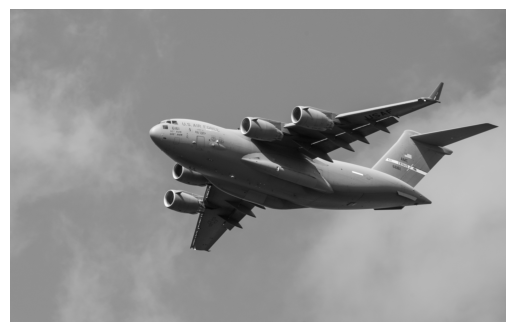

In [3]:
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [4]:
type(image)

numpy.ndarray

In [5]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [6]:
image.shape


(2270, 3600)

In [7]:
image[0][0]

140

In [8]:
image_bgr = cv2.imread("/content/images/plane.jpg", cv2.IMREAD_COLOR)

image_bgr

array([[[195, 144, 111],
        [191, 140, 107],
        [201, 150, 117],
        ...,
        [187, 136, 103],
        [194, 143, 110],
        [189, 138, 105]],

       [[199, 148, 115],
        [191, 140, 107],
        [204, 153, 120],
        ...,
        [197, 146, 113],
        [179, 128,  95],
        [181, 130,  97]],

       [[207, 156, 123],
        [194, 143, 110],
        [199, 148, 115],
        ...,
        [176, 125,  92],
        [182, 131,  98],
        [189, 138, 105]],

       ...,

       [[211, 162, 124],
        [201, 152, 114],
        [201, 149, 112],
        ...,
        [189, 159, 140],
        [186, 156, 137],
        [183, 153, 134]],

       [[201, 152, 114],
        [205, 156, 118],
        [202, 153, 115],
        ...,
        [188, 158, 139],
        [190, 160, 141],
        [187, 160, 140]],

       [[200, 148, 111],
        [195, 143, 106],
        [204, 152, 115],
        ...,
        [188, 158, 139],
        [187, 160, 140],
        [187, 160, 140]]

In [9]:
image_bgr[0, 0]

array([195, 144, 111], dtype=uint8)

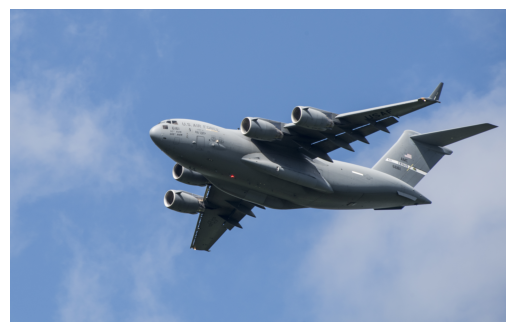

In [10]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()

#Saving Images

In [11]:
#save an image for preprocessing

image = cv2.imread("/content/images/plane.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imwrite("/content/images/new_plane.jpg", image)

True

#Resizing Images

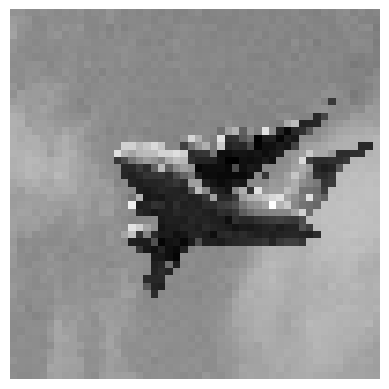

In [12]:
image = cv2.imread("/content/images/plane.jpg", cv2.IMREAD_GRAYSCALE)

image_50x50 = cv2.resize(image, (50, 50))

plt.imshow(image_50x50, cmap="gray")
plt.axis("off")
plt.show()

#Cropping Images

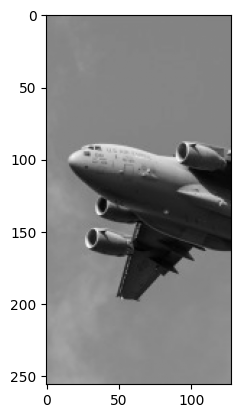

In [13]:
#remove the outer portion of the image to change its dimensions.

image = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

image_cropped = image[:, :128]

plt.imshow(image_cropped, cmap="gray")
plt.show()

#Blurring Images

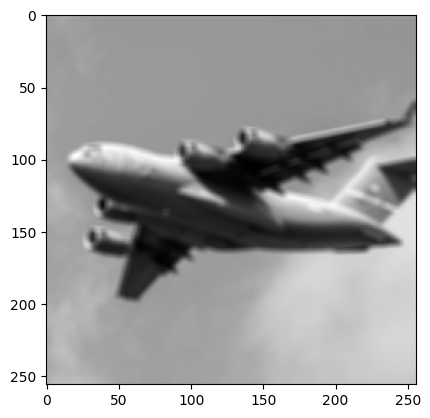

In [14]:
# smooth out an image

image = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

image_blurry = cv2.blur(image, (5, 5))

plt.imshow(image_blurry, cmap="gray")
plt.show()

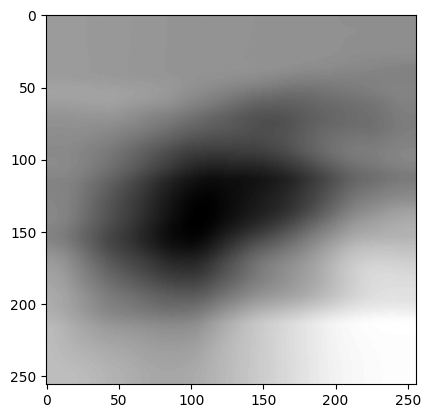

In [15]:
image_blurry = cv2.blur(image, (100, 100))

plt.imshow(image_blurry, cmap="gray")
plt.show()

In [16]:
kernel = np.ones((5, 5)) / 25.0

kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

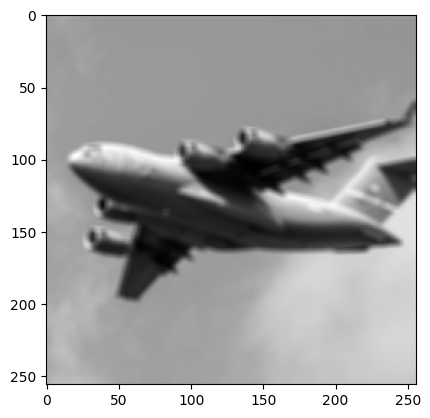

In [17]:
image_kernel = cv2.filter2D(image, -1, kernel)

plt.imshow(image_kernel, cmap="gray")
plt.show()

#Sharpening Images

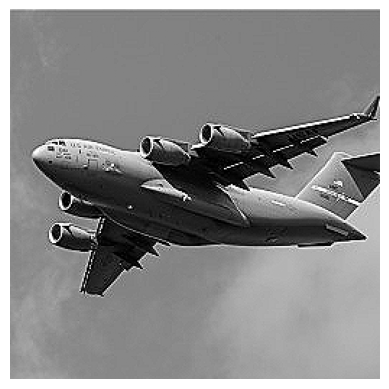

In [18]:
# sharpen an image.
image = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray")
plt.axis("off")
plt.show()

#Enhancing Contrast

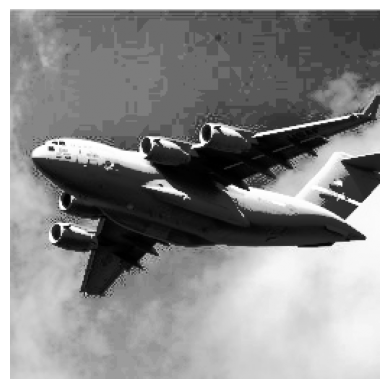

In [19]:
#increase the contrast between pixels in an image.

image = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

image_enhanced = cv2.equalizeHist(image)

plt.imshow(image_enhanced, cmap="gray")
plt.axis("off")
plt.show()

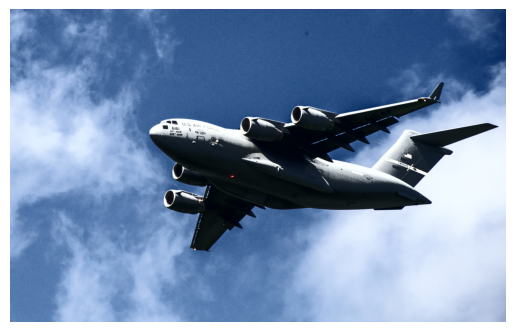

In [20]:
image_bgr = cv2.imread("/content/images/plane.jpg")

image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()

#Isolating Colors

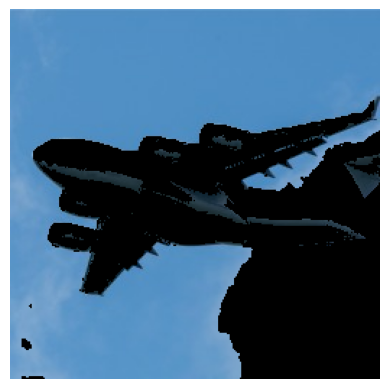

In [22]:
#isolate a color in an image.

image_bgr = cv2.imread("/content/images/plane_256x256.jpg")

image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()

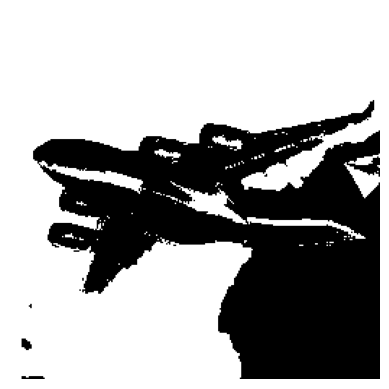

In [23]:
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

#Binarizing Images

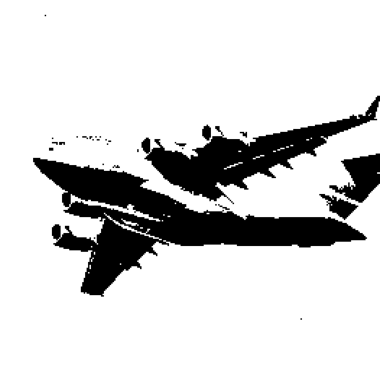

In [24]:
#Given an image, you want to output a simplified version.
#Thresholding is the process of setting pixels with intensity greater than some value to be white and less than the value to be black
#adaptive threshold is imfluenced by neighbours

image_grey = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

max_output_value = 255
neighborhood_size = 99
substarct_from_mean = 10

image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        substarct_from_mean)


plt.imshow(image_binarized, cmap="gray")
plt.axis("off")
plt.show()


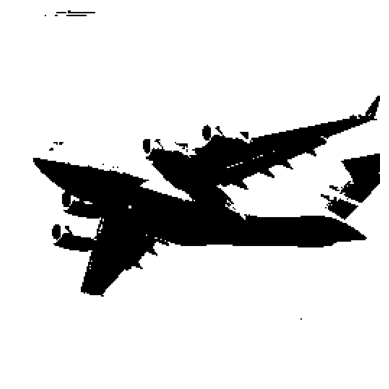

In [25]:
#A major benefit of thresholding is denoising an image—​keeping only the most important elements

image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        substarct_from_mean)


plt.imshow(image_binarized, cmap="gray")
plt.axis("off")
plt.show()


#Removing Backgrounds

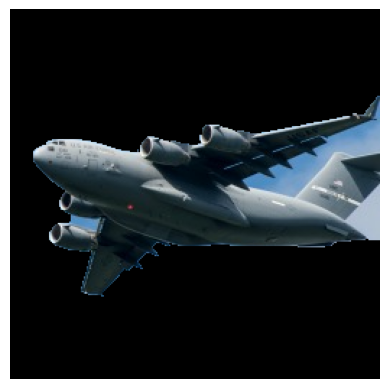

In [27]:
#isolate the foreground of an image.

image_bgr = cv2.imread("/content/images/plane_256x256.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

rectangle = (0, 56, 256, 150)

mask = np.zeros(image_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb,
            mask,
            rectangle,
            bgdModel,
            fgdModel,
            5,
            cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype("uint8")

image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

plt.imshow(image_rgb_nobg)
plt.axis("off")
plt.show()


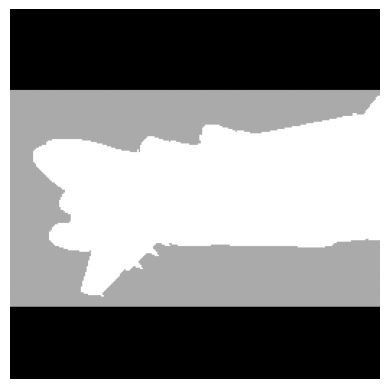

In [28]:
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

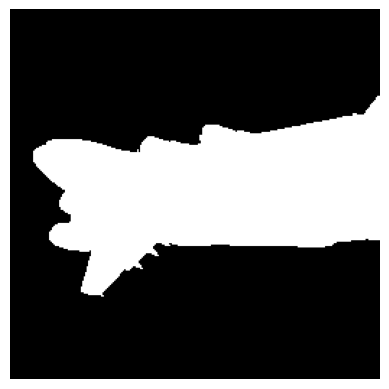

In [29]:
plt.imshow(mask_2, cmap="gray")
plt.axis("off")
plt.show()

#Detecting Edges

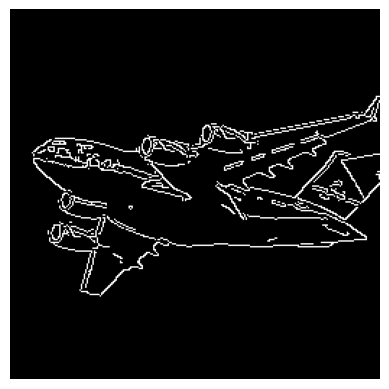

In [31]:
# find the edges in an image.

image_gray = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

median_intensity = np.median(image_gray)

lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap="gray")
plt.axis("off")
plt.show()

In [32]:
median_intensity

132.0

#Detecting Corners

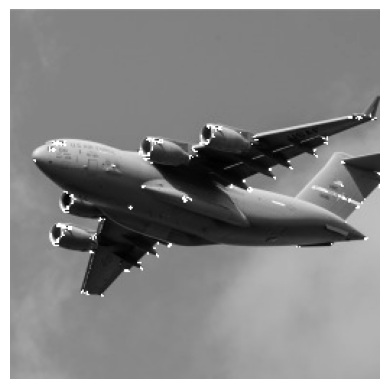

In [48]:
# detect the corners in an image

image_bgr = cv2.imread("/content/images/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

block_size = 2
aperture = 3
free_parameter = 0.04

detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

dectector_responses = cv2.dilate(detector_responses, None)

threshold = 0.02

image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255, 255, 255]

image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.show()


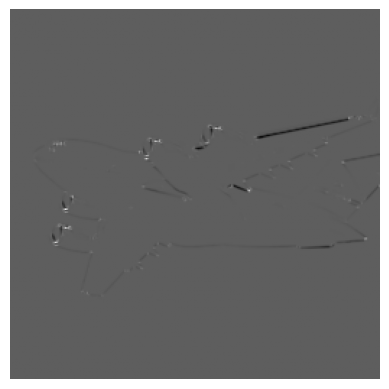

In [49]:
plt.imshow(detector_responses, cmap="gray")
plt.axis("off")
plt.show()

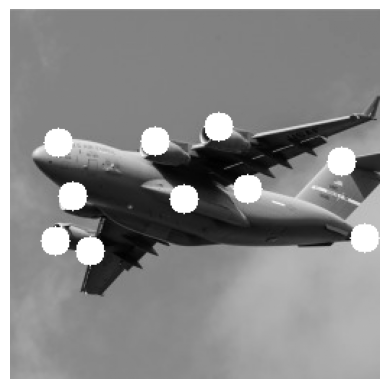

In [46]:
# detect the corners in an image

image_bgr = cv2.imread("/content/images/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

corners_to_detect = 10
minimum_qulaity_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray,
                            corners_to_detect,
                            minimum_qulaity_score,
                            minimum_distance)

corners = np.int16(corners)

for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255, 255, 255), -1)


image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.show()


#Creating Features for Machine Learning

In [50]:
#convert an image into an observation for machine learning.

image  = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

image_10x10 = cv2.resize(image, (10, 10))

image_10x10.flatten()


array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

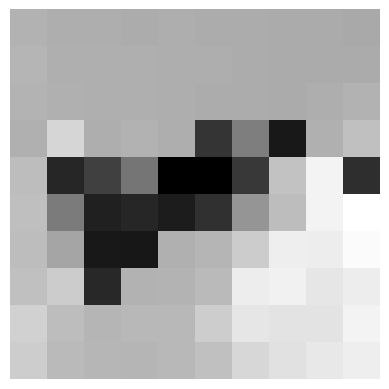

In [51]:
plt.imshow(image_10x10, cmap="gray")
plt.axis("off")
plt.show()

In [52]:
image_10x10.shape

(10, 10)

In [53]:
image_10x10.flatten().shape

(100,)

In [54]:
image_color = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_color_10x10 = cv2.resize(image_color, (10, 10))

image_color_10x10.flatten().shape

(300,)

In [55]:
image_256x256_gray = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

image_256x256_gray.flatten().shape

(65536,)

In [56]:
image_256x256_gray = cv2.imread("/content/images/plane_256x256.jpg", cv2.IMREAD_COLOR)

image_256x256_gray.flatten().shape

(196608,)

#Encoding Color Histograms as Features

In [60]:
#create a set of features representing the colors appearing in an image.

np.random.seed(42)

image_bgr = cv2.imread("/content/images/plane_256x256.jpg")

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

features = []

colors = ("r", "g", "b")

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                             [i],
                             None,
                             [256],
                             [0, 256])
    features.extend(histogram)

observation = np.array(features).flatten()

print(observation[0:5])

[1027.  217.  182.  146.  146.]


In [61]:
image_rgb[0, 0]

array([107, 163, 212], dtype=uint8)

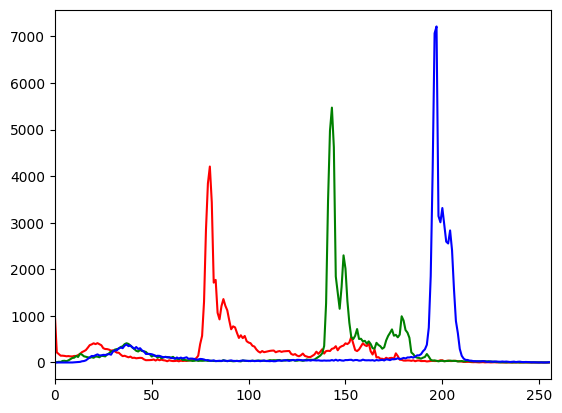

In [62]:
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                             [i],
                             None,
                             [256],
                             [0, 256])
    plt.plot(histogram, color=channel)
    plt.xlim([0, 256])

plt.show()

#Using Pretrained Embeddings as Features

In [64]:
#You want to load pretrained embeddings from an existing model in PyTorch and use them as input to one of your own models.

import torch
from torchvision import transforms
import torchvision.models as models

image_bgr = cv2.imread("/content/images/plane.jpg", cv2.IMREAD_COLOR)

convert_tensor = transforms.ToTensor()
pytorch_image = convert_tensor(np.array(image_bgr))

model = models.resnet18(pretrained=True)

layer = model._modules.get("avgpool")

model.eval()

with torch.no_grad():
    embeddding = model(pytorch_image.unsqueeze(0))

torch.Size([1, 1000])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 135MB/s]


torch.Size([1, 1000])

In [68]:
import tensorflow as tf
import tensorflow_hub as hub

image_bgr = cv2.imread("/content/images/plane.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

tf_image = tf.image.convert_image_dtype([image_rgb], tf.float32)

embedding_model = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5"
)

embeddings = embedding_model(tf_image)
print(embeddings.shape)

(1, 1024)


#Detecting Objects with OpenCV

mkdir: cannot create directory ‘models’: File exists
--2025-02-20 05:56:09--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘models/haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2025-02-20 05:56:09 (12.6 MB/s) - ‘models/haarcascade_frontalface_default.xml’ saved [930127/930127]



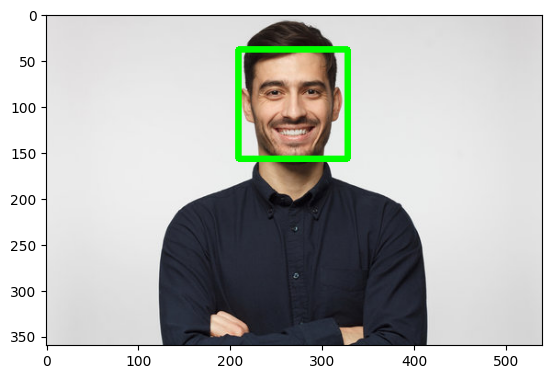

In [71]:
#detect objects in images using pretrained cascade classifiers with OpenCV.

!mkdir models
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P models

face_cascade = cv2.CascadeClassifier()
face_cascade.load(
    cv2.samples.findFile(
         "/content/models/haarcascade_frontalface_default.xml"
    )
)

image_bgr = cv2.imread("/content/images/p.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

faces = face_cascade.detectMultiScale(image_rgb)
for(x, y, w, h) in faces:
    cv2.rectangle(image_rgb, (x, y),
                  (x + h, y + w),
                   (0, 255, 0), 5)

plt.subplot(1, 1, 1)
plt.imshow(image_rgb)
plt.show()

# Classifying Images with Pytorch

In [73]:
# classify images using pretrained deep learning models in Pytorch

import cv2
import json
import numpy as np
import torch
from torchvision import transforms
from torchvision.models import resnet18
import urllib.request

# Get imagenet classes
# The original URL pointed to a directory, not a file
# This URL points to the actual imagenet_class_index.json file
url = urllib.request.urlopen(
    "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json"
)
imagenet_class_index = json.load(url)

# Instantiate pretrained model
model = resnet18(pretrained=True)

# Load image
image_bgr = cv2.imread("images/plane.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Convert to pytorch data type
convert_tensor = transforms.ToTensor()
pytorch_image = convert_tensor(np.array(image_rgb))

# Set model to evaluation mode
model.eval()

# Make a prediction
prediction = model(pytorch_image.unsqueeze(0))

# Get the index of the highest predicted probability
_, index = torch.max(prediction, 1)

# Convert that to a percentage value
percentage = torch.nn.functional.softmax(prediction, dim=1)[0] * 100

# Print the name of the item at the index along with the percent confidence
print(imagenet_class_index[str(index.tolist()[0])][1],
    percentage[index.tolist()[0]].item())

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


airship 6.056997776031494
